   Tweet_ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                          Tweet_Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
           Tweet_ID
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000
Tweet_ID        0
Entity          0
Sentiment       0
Tweet_Text    686
dtype: int64
Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


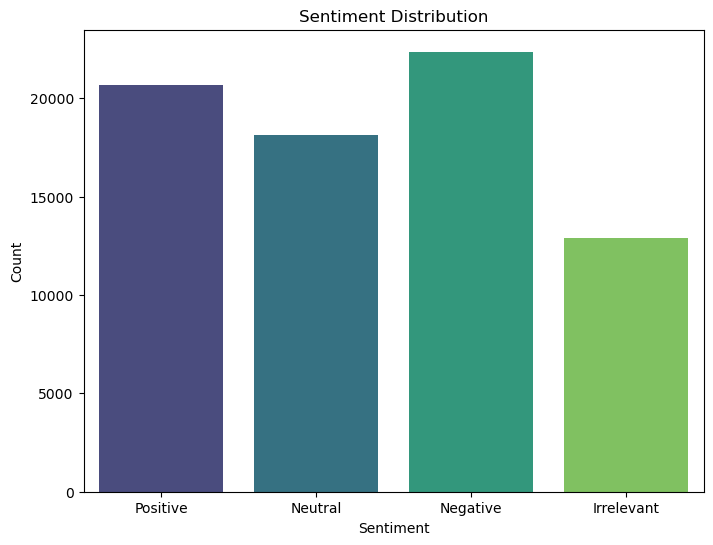

Entity
MaddenNFL               2377
LeagueOfLegends         2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Facebook                2362
Microsoft               2361
Dota2                   2359
WorldOfCraft            2357
ApexLegends             2353
Name: count, dtype: int64


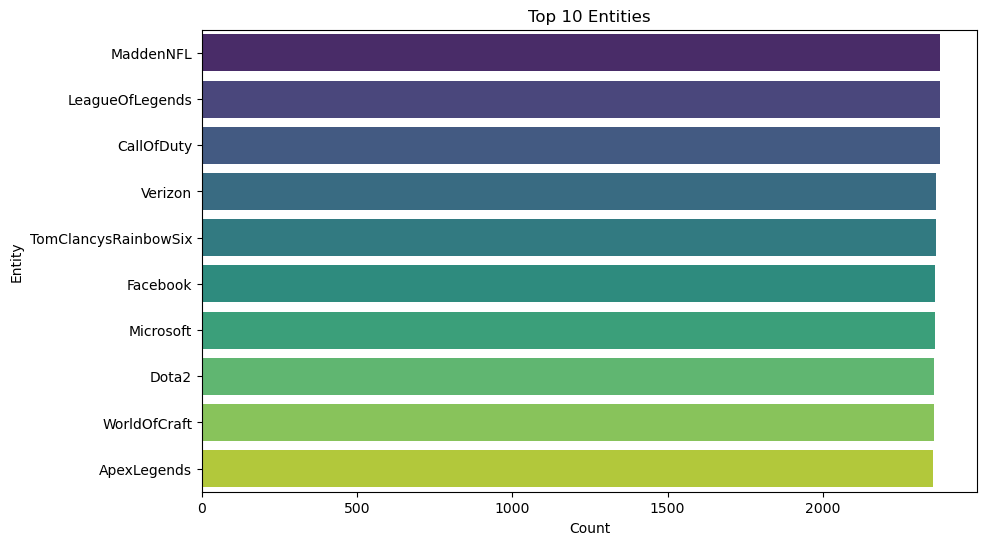

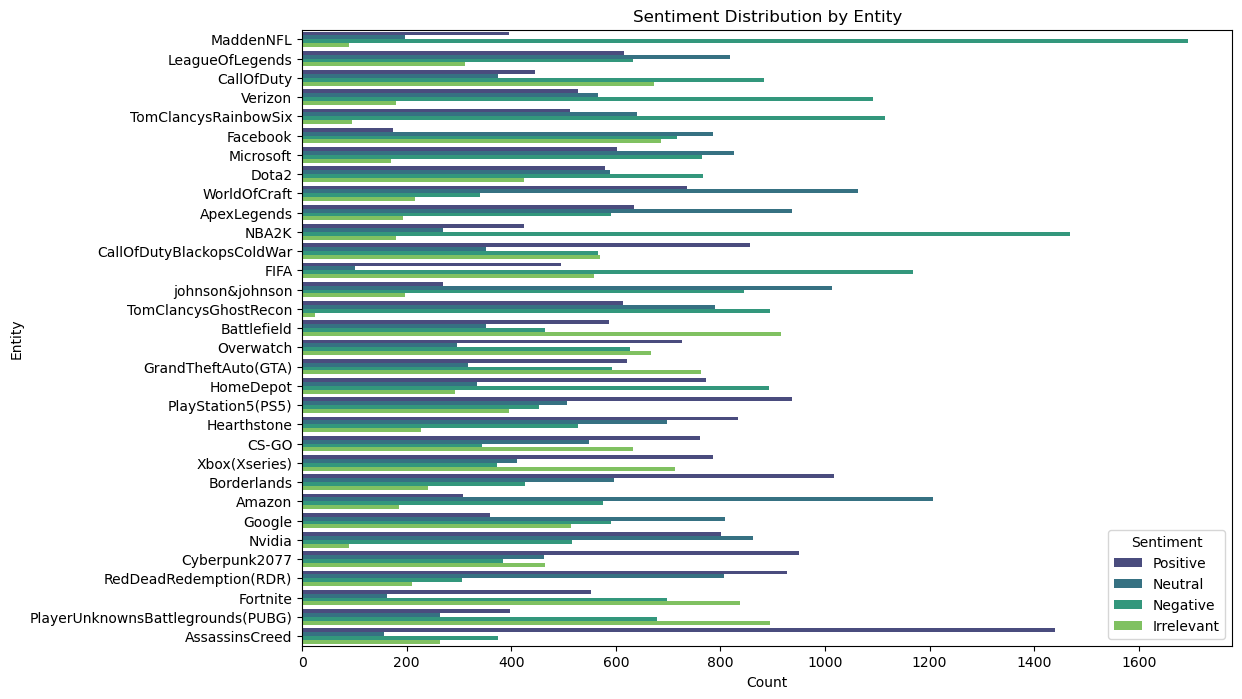

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = 'C:\\Users\\Ubaid-khan\\Desktop\\Internship\\twitter_training.csv'
column_names = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Text']
df = pd.read_csv(
    file_path, 
    sep=',', 
    header=None, 
    names=column_names, 
    on_bad_lines='skip', 
    encoding='utf-8', 
    quotechar='"'
)

# Display the first few rows of the dataset
print(df.head())

# Basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Most common entities
top_entities = df['Entity'].value_counts().head(10)
print(top_entities)

# Plot the top entities
plt.figure(figsize=(10, 6))
sns.barplot(y=top_entities.index, x=top_entities.values, palette='viridis')
plt.title('Top 10 Entities')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()

# Sentiment distribution for each entity
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Entity', hue='Sentiment', order=df['Entity'].value_counts().index, palette='viridis')
plt.title('Sentiment Distribution by Entity')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.show()

# Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    # Substituting multiple spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Removing prefixed 'b'
    text = re.sub(r'^b\s+', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['Tweet_Text'] = df['Tweet_Text'].apply(preprocess_text)

# Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['Tweet_Text']).toarray()
y = df['Sentiment']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sentiment Classification
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
